# Project Overview

In a short paragragh describe the problem you want to explore use data science techniques

# Problem Description
In one sentence describe the problem you want to explore with data science

# Subject Matter Expertise

In bulleted format, describe the subject matters that will help you explore your topic. Example:
 
1. Data Analysis
2. Data Visualization
3. Statistics and Probability
4. Hypothesis Testing
5. Linear Regression

# Assumptions
List any assumptions you may have about the topic. 
`Assumptions are a thing that is accepted as true or as certain to happen, without proof.`


# Steps to Explore the Topic and Problem

List the steps you're going to take to explore the topic using the data sources you identify and the techniques you already know. Please list them as step 1, step 2, step 3. Example:

1. Download data from U.S. Census
2. Web-scrape data from IMDB
3. Find the number of actors that do not live in california
4. Calculate the median salary for actors that do not live in California
5. Show the relationship between actors living in CA vs outside CA with pie chart
6. Show relationship between actors' salary living in CA vs outside CA with bar chart
7. Calculate median home price of homes in CA using web scrape data
8. Compare this to median salary for actors using bar chart
9. Make some intitial Conclusions on actor salary, location, and median home price on if actors can afford to live in CA.

# Data Sources:

In bulleted format, list where you will get data from. Data sources must include one existing data source and web-scrapted source. Example:

1. U.S. Census Estimates of the Total Resident Population and Resident Population Age 18 Years and Older for the United States, States, and Puerto Rico `https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/SCPRC-EST2019-18+POP-RES.csv`
2. Kaggle Elon Musk Tweets 'https://www.kaggle.com/kingburrito666/elon-musk-tweets'

# Data Exploration
Describe the data using what you know. For larger datasets may have to pull out columns that are of interst to you.

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [82]:
# Dataset 1

epl_players = pd.read_csv("epldata_final.csv")
epl_players.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
epl_players.shape

In [ ]:
# Web scrape points table from Premier League website

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

def season_table(url):
    team_names = []
    team_positions = []

    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req)
    bs = BeautifulSoup(webpage.read(),'html.parser')

    teams = bs.find_all("tr", { "data-filtered-table-row" : "26" })
    for item in teams:
        team_names.append(item["data-filtered-table-row-name"])
        team_positions.append(item.find("span", { "class" : "value"}).text)
    
    points_table = pd.DataFrame({"team_name" : team_names, "team_position" : team_positions})
    return points_table

In [ ]:
# Dataset 2

url_17_18 = "https://www.premierleague.com/matchweek/1572/table"
table_17_18 = season_table(url_17_18)
table_17_18

In [ ]:
# Dataset 3

url_18_19 = "https://www.premierleague.com/matchweek/3272/table"
table_18_19 = season_table(url_18_19)
table_18_19

# Data Cleaning
Show techniques you use to reduce impact of outliers, drop missing, or null values (if any)

In [ ]:
epl_players.isnull().sum()

# Describe the Data Using Descriptive Stats
Use descriptive stats to tell us about your data. Must include mean, median, and mode where applicable. Also must talk about normality of data.

Remember what `standard deviation`, `mean`, `central tendency`, and `variance` mean for your data

In [ ]:
def find_descriptive_stats(column_name):
    mean_val = epl_players[column_name].mean()
    median_val = epl_players[column_name].median()
    max_val = epl_players[column_name].max()
    min_val = epl_players[column_name].min()
    std_val = epl_players[column_name].std()
    var_val = epl_players[column_name].var()
    q25 = np.quantile(epl_players[column_name], 0.25)
    q75 = np.quantile(epl_players[column_name], 0.75)
    
    print("Mean: ", mean_val)
    print("Median: ", median_val)
    print("Max: ", max_val)
    print("Min: ", min_val)
    print("Standard Deviation: ", std_val)
    print("Variance: ", var_val)
    print("25th Percentile: ", q25)
    print("75th Percentile : ", q75)
    
    return (mean_val, median_val, max_val, min_val, std_val, var_val, q25, q75)
    
for col_name in ["age", "market_value", "page_views", "fpl_value"]:
    print("For column: ", col_name)
    find_descriptive_stats(col_name)
    print()
    

# Inferential Statistics

Todo: related to probability, probably this should  be in the probability section below

# Data Visualization Continued
Use everything from the miniproject 1 to describe the plots you will use to visualize you data. 

Must use histogram, bar charts, and pie charts to describe aspects abou tthe data

Determine if your data is normal or not!


In [116]:
'''
age with histogram
market value histogram
page views with histogram
club and their  players average market value with bar chart
club and their  players  average page views  with bar chart
nationality in pie chart, might be unrelated
age in pie chart

relation of age and market value in scatter plot
relation of page viewes and market value in scatter plot
'''

def plot_histogram(data, title, xlabel, ylabel):
    plt.hist(data, edgecolor="black", linewidth=1.2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# width should be smaller than  bar_size_multiplier
# Do not display xticks by default as there might not be enough space
def plot_bar_chart(distribution, bar_size_multiplier, width, figsize_x, figsize_y, title, xlabel, ylabel, xticks=False):
    plt.figure(figsize=(figsize_x, figsize_y))
    x_pos = [i*bar_size_multiplier for i in range(len(distribution))]
    keys = []
    values = []
    for key, value in distribution.items():
        keys.append(key)
        values.append(np.mean(value))
    plt.bar(x_pos, values, width=width)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks:
        plt.xticks(x_pos, keys) 
    plt.show()

def plot_pie_chart(distribution):
    keys = []
    values = []
    for key, value in distribution.items():
        keys.append(key)
        values.append(len(value))
    plt.pie(values, labels=keys)
    plt.show()

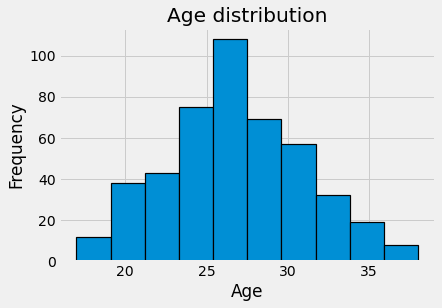

In [78]:
plot_histogram(epl_players["age"], "Age distribution", "Age", "Frequency")

In [92]:
def record_one_distribution(match_column, match_value, record_column):
    return epl_players[epl_players[match_column] == match_value][record_column].tolist()

def record_all_distributions(match_column, record_column):
    unique_values = epl_players[match_column].unique().tolist()
    distributions = {}
    
    for match_value in unique_values:
        distributions[match_value] = record_one_distribution(match_column, match_value, record_column)
    return distributions

# Record distributions in dictionaries
clubs_to_market_val = record_all_distributions("club", "market_value")

clubs_to_page_views = record_all_distributions("club", "page_views")

positions_to_market_val = record_all_distributions("position", "market_value")


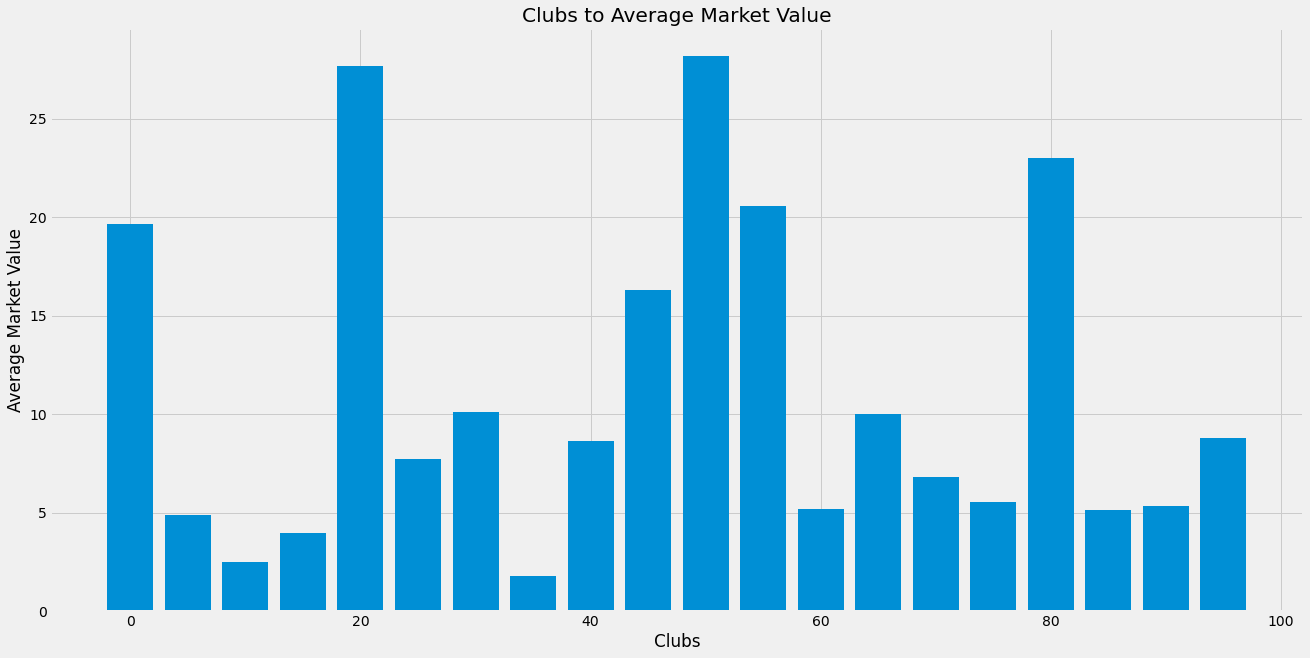

In [110]:
plot_bar_chart(clubs_to_market_val, 5, 4, 20, 10, "Clubs to Average Market Value", "Clubs", "Average Market Value")

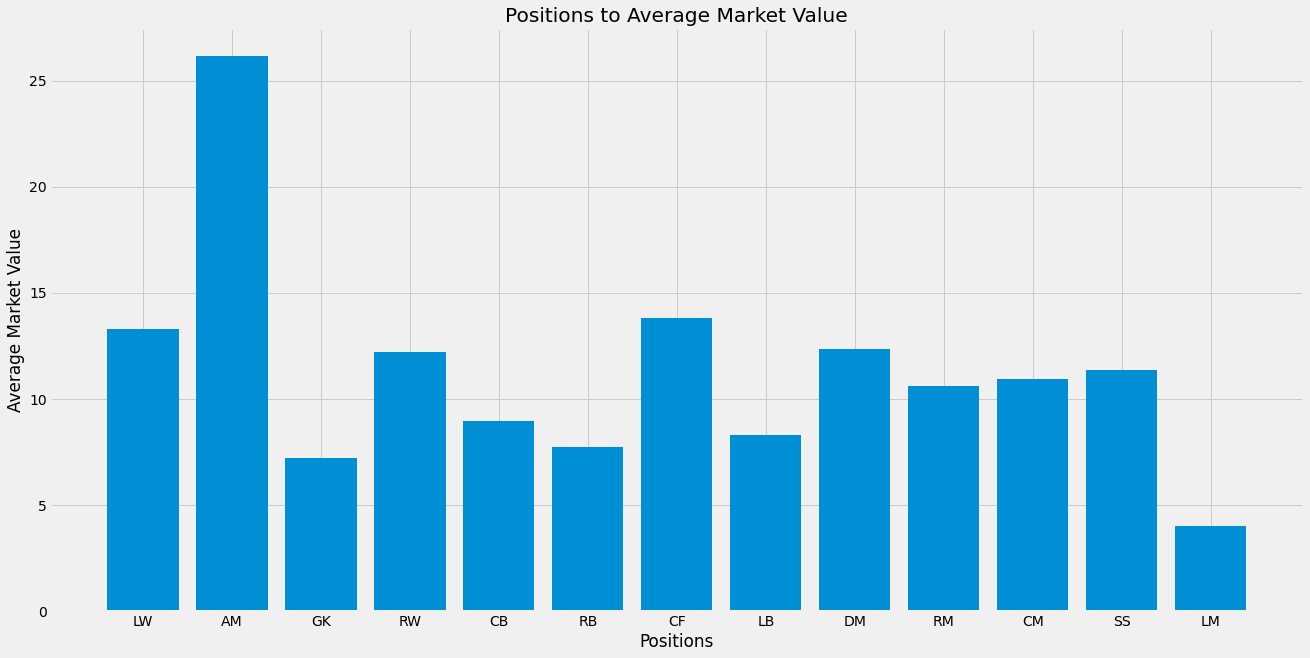

In [113]:
plot_bar_chart(positions_to_market_val, 5, 4, 20, 10, "Positions to Average Market Value", "Positions", "Average Market Value", xticks=True)


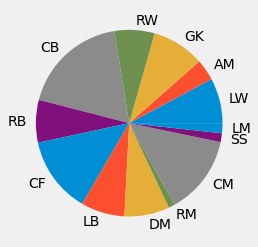

In [117]:
plot_pie_chart(positions_to_market_val)

## Data Sampling

Draw random some samples from your dataset(s)
(If you joined your dataset into one large dataset, only sample randomly from this large dataset)

You must describe how you choose to pick the random samples, i.e. systematic, probablistic sampling

You must describe if you draw random samples with or without replacement

Describe why or why not you chose to randomly draw samples with replacement or without replacement

In [ ]:
# comparing two different position players and their average market value

# check which size of sample will give a representativ distribution of the sample

# take a random sample of player data
# calculate observed difference of the mean of their market value
# for above, define a function that will take a sample and return the average difference in the mean market value
# to calculate the difference, take all the market values, shuffle them, add these as new column to dataframe, and
# find the difference of the market value with this value in the new suffled column value

# use bootstrapping to a lot of samples from this sample
# all these samaples will give a  distribution of empirical differences
# calculate the p-value and conclude a hypotheesis

# hypothesis: players of certain position have bigger market value than player of another position

## Find Probability
Find the probability of two events that must both happen in your data analysis

Find the probablity of an event that doesn't happen using your dataset(s)

Find the probability of event that is equally likely occur. You might have to think about this in regards to your problem that you are exploring



In [ ]:
# probability that a player plays in this potition 
# probability that a player plays in other position

## Testing Hypotheses

Choose two hypotheses you want to explore in regards to your topic.
Examples:
The state of Montana likes cheesecake as a desert?
Have the demographics of Washington, DC decreased over the past decade?
United States streaming services mainly stream rap or hip/hop?

### Note: Make sure to note the Null and the alternative hypotheses for each of the questions you want to test

## Test Statistics 
For each of your questions list the test statistic that you are going to use to test the hypothesis.

## Observed Values
Show the oberved value of the test statistics

# Hypothesis Tests Conclusions
Based on what you found about your topic communicate it to the audience. 

# Topic Conclusions
Sum up the conclusions about what you did and why it is interesting to you, the public reading your analysis or to a particular population

# Normal distribution of columns and their conversion to standard units,  this might be relevant in the correlation part as well

# Correlation of market_value and fpl_value

Use scatter plot too show the relation between these variables

Define a generic function that can be used to explore the corellation between any set of variables

# Regression parameters and a scatter plot with regression line, see lab 15


# Least square regression line and scatter plot with this line

# Relation of average value of a team's players and the position in table for the season for both seasons
Draw the relation between these columns

In [ ]:
# relation of average pay of players in a team to the potition (or change in position) of team in table

# Sort the expected team position based on the average pay for players in team  
# Difference with the actual position
# Find the mean difference
# Use this difference, find the p-value maybe

# Do the same for another year to see if the current average pay of players affected the position in the next year's table
# Make hypothesis and conclusions